In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2228 - accuracy: 0.9327 - val_loss: 0.0834 - val_accuracy: 0.9776
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.0537 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.0429 - val_accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0307 - val_accuracy: 0.9898


In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9833


[0.05518694967031479, 0.983299970626831]

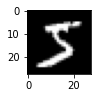

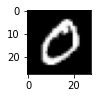

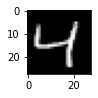

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [9]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets
['saved_model.pb', 'variables', 'keras_metadata.pb', 'assets']


In [10]:
lenet_5_model.save("my.h5")

In [11]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [40]:
json_model = lenet_5_model.to_json()

In [41]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [42]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [96]:
lenet_5_model.layers[2].get_weights()

[array([[[[-6.04243651e-02,  1.72588035e-01, -6.94183931e-02, ...,
            3.52107771e-02,  7.52414018e-02, -3.57712992e-02],
          [-1.04009137e-01, -2.11325400e-02,  1.90630525e-01, ...,
            1.95351504e-02,  1.68472305e-01, -6.94724768e-02],
          [ 8.74496764e-04, -1.09834857e-01,  9.93049145e-02, ...,
            2.37184182e-01, -9.10815522e-02,  1.48030266e-01],
          [-1.26971319e-01,  2.48234615e-01, -1.19278513e-01, ...,
           -8.31483379e-02, -1.60210766e-02, -1.49295181e-01],
          [-6.43436313e-02, -6.50656223e-02, -1.35661930e-01, ...,
           -1.92142695e-01, -9.90023389e-02, -5.64299859e-02],
          [-7.16623664e-02, -2.17968032e-01,  1.34012148e-01, ...,
           -4.31144722e-02, -8.92032832e-02,  7.40446001e-02]],
 
         [[-1.26462340e-01,  8.31222683e-02, -6.66276366e-02, ...,
           -2.52762958e-02,  9.79679227e-02, -4.35573459e-02],
          [-8.69327262e-02, -9.32641327e-02,  1.23002045e-01, ...,
            1.121484

In [98]:
a = lenet_5_model.layers[2].get_weights()[0]
a.shape

(5, 5, 6, 16)

In [100]:
f = open("conv2_w.txt", "w")
for i in range(16):
    for j in range(6):
        for k in range(5):
            for n in range(5):
                f.write(str(a[n][k][j][i])+'\n')
f.close()


In [65]:
a.shape[1]

10